Author: Pudhuyugan

Task 1

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

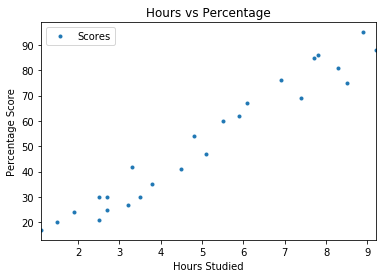

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = s_data['Hours']
y = s_data['Scores']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=101) 
print(X_train)

21    4.8
2     3.2
3     8.5
1     5.1
14    1.1
18    6.1
0     2.5
12    4.5
5     1.5
23    6.9
20    2.7
4     3.5
8     8.3
13    3.3
9     2.7
15    8.9
24    7.8
6     9.2
17    1.9
11    5.9
Name: Hours, dtype: float64


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [21]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train.values.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


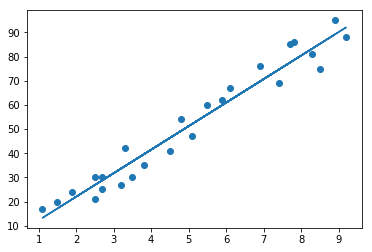

In [23]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [32]:
y_pred = lm.predict(X_test.values.reshape(-1,1)) # Predicting the scores
print(y_test)

16    30
10    85
22    35
19    69
7     60
Name: Scores, dtype: int64


In [31]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
16,30,26.845397
10,85,77.458594
22,35,39.498696
19,69,74.538601
7,60,56.045318


In [0]:
hours = 9.25
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [29]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

MAE: 4.937597792467705
MSE: 26.675642597052235
RMSE: 5.164846812544612
Mean Absolute Error: 4.937597792467705
